# Chapter 8

## Section 8.2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_students = pd.read_pickle('Chapter 5/students.pickle')
df_summarized_orders = pd.read_pickle(
                       'Chapter 5/summarized_orders.pickle')
df_orders = pd.read_pickle('Chapter 7/orders.pickle')

## Section 8.3

In [3]:
df_students.head()

,FIRST_NAME,LAST_NAME,YEAR,HOME_STATE,AGE,CALC_101_FINAL,ENGLISH_101_FINAL
0,Daniel,Smith,1,NY,18,90.0,80.0
1,Ben,Leibstrom,1,NY,19,80.0,NaN
2,Kavita,Kanabar,1,PA,19,NaN,NaN
3,Linda,Thiel,4,CA,22,60.0,40.0
4,Omar,Reichel,2,OK,21,70.0,50.0


In [4]:
df_students.groupby('YEAR').AGE.mean()

YEAR
1    18.2
2    20.0
3    20.0
4    22.0
Name: AGE, dtype: float64

In [5]:
df_students.groupby('YEAR').AGE.mean().reset_index()

,YEAR,AGE
0,1,18.2
1,2,20.0
2,3,20.0
3,4,22.0


In [6]:
df_students.groupby(['YEAR', 'HOME_STATE']).AGE.mean()

YEAR  HOME_STATE
1     FL            17.5
      NY            18.5
      PA            19.0
2     HI            19.0
      OK            21.0
3     NY            20.0
4     CA            22.0
Name: AGE, dtype: float64

In [7]:
df_students.groupby(
              ['YEAR', 'HOME_STATE']).AGE.mean().reset_index()

,YEAR,HOME_STATE,AGE
0,1,FL,17.5
1,1,NY,18.5
2,1,PA,19.0
3,2,HI,19.0
4,2,OK,21.0
5,3,NY,20.0
6,4,CA,22.0


In [8]:
df_students.groupby('YEAR')['AGE'].mean()

YEAR
1    18.2
2    20.0
3    20.0
4    22.0
Name: AGE, dtype: float64

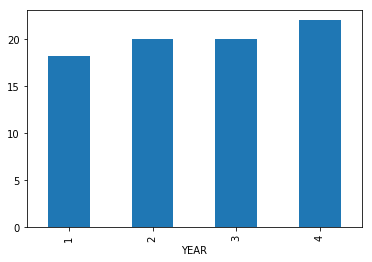

In [9]:
df_students.groupby('YEAR').AGE.mean().plot(kind='bar')

In [10]:
( df_summarized_orders.groupby('RESTAURANT_NAME')
                                 .NUM_ORDERS.mean() )

RESTAURANT_NAME
Bryant Park         871.436782
Columbia            687.150685
Flatiron            772.556164
Midtown             891.136986
NYU                1180.438356
Upper East Side     774.650704
Upper West Side     770.372603
Williamsburg        862.120548
Name: NUM_ORDERS, dtype: float64

In [11]:
df_orders.RESTAURANT_NAME.value_counts() / 365

NYU                1180.438356
Midtown             891.136986
Williamsburg        862.120548
Flatiron            772.556164
Upper West Side     770.372603
Upper East Side     753.427397
Columbia            687.150685
Bryant Park         623.136986
Name: RESTAURANT_NAME, dtype: float64

### Section 8.3.1

In [12]:
df_orders.groupby('RESTAURANT_NAME').TYPE.size()

RESTAURANT_NAME
Bryant Park        227445
Columbia           250810
Flatiron           281983
Midtown            325265
NYU                430860
Upper East Side    275001
Upper West Side    281186
Williamsburg       314674
Name: TYPE, dtype: int64

In [13]:
df_orders.groupby('RESTAURANT_NAME').size()

RESTAURANT_NAME
Bryant Park        227445
Columbia           250810
Flatiron           281983
Midtown            325265
NYU                430860
Upper East Side    275001
Upper West Side    281186
Williamsburg       314674
dtype: int64

In [14]:
df_orders.RESTAURANT_NAME.value_counts()

NYU                430860
Midtown            325265
Williamsburg       314674
Flatiron           281983
Upper West Side    281186
Upper East Side    275001
Columbia           250810
Bryant Park        227445
Name: RESTAURANT_NAME, dtype: int64

In [15]:
df_orders.groupby(['RESTAURANT_NAME', 'TYPE']).size()

RESTAURANT_NAME  TYPE    
Bryant Park      DELIVERY     15613
                 IN_STORE    171494
                 PICKUP       40338
Columbia         DELIVERY     25247
                 IN_STORE    182603
                 PICKUP       42960
Flatiron         DELIVERY     28859
                 IN_STORE    204607
                 PICKUP       48517
Midtown          DELIVERY     22380
                 IN_STORE    244980
                 PICKUP       57905
NYU              DELIVERY     43310
                 IN_STORE    314832
                 PICKUP       72718
Upper East Side  DELIVERY     52080
                 IN_STORE    180605
                 PICKUP       42316
Upper West Side  DELIVERY     53337
                 IN_STORE    184588
                 PICKUP       43261
Williamsburg     DELIVERY     31822
                 IN_STORE    229427
                 PICKUP       53425
dtype: int64

### Section 8.3.2

In [16]:
( df_orders.groupby(['RESTAURANT_NAME', 'TYPE'])
                         .size().reset_index().head() )

,RESTAURANT_NAME,TYPE,0
0,Bryant Park,DELIVERY,15613
1,Bryant Park,IN_STORE,171494
2,Bryant Park,PICKUP,40338
3,Columbia,DELIVERY,25247
4,Columbia,IN_STORE,182603


In [17]:
df_orders.groupby(['RESTAURANT_NAME', 'TYPE']).size().unstack()

TYPE,DELIVERY,IN_STORE,PICKUP
RESTAURANT_NAME,,,
Bryant Park,15613,171494,40338
Columbia,25247,182603,42960
Flatiron,28859,204607,48517
Midtown,22380,244980,57905
NYU,43310,314832,72718
Upper East Side,52080,180605,42316
Upper West Side,53337,184588,43261
Williamsburg,31822,229427,53425


## Section 8.4

In [18]:
( df_orders.groupby('RESTAURANT_NAME')[['DRINKS', 'COOKIES']]
                                                      .mean() )

,DRINKS,COOKIES
RESTAURANT_NAME,,
Bryant Park,0.098138,0.261294
Columbia,0.066572,0.259049
Flatiron,0.097637,0.259161
Midtown,0.126128,0.260683
NYU,0.075769,0.258898
Upper East Side,0.118145,0.257603
Upper West Side,0.097032,0.260475
Williamsburg,0.096446,0.258750


In [19]:
# Optional code - multiple aggregations with a join
# =================================================

# Find the average number of drinks by restaurant
df_av_drinks = ( df_orders.groupby('RESTAURANT_NAME')
                              .DRINKS.mean().reset_index() )

# Find the number of orders with a bowl by restaurant
df_num_w_bowls = ( df_orders.groupby('RESTAURANT_NAME')
                              .MAIN.count().reset_index() )

# Join the two to produce a combined DataFrame
pd.merge( df_av_drinks.rename(columns={'DRINKS':'AV_DRINKS'}),
          df_num_w_bowls.rename(columns={'MAIN':'N_W_MAIN'}),
          left_on='RESTAURANT_NAME',
          right_on='RESTAURANT_NAME',
          how='outer',
          validate='one_to_one')

,RESTAURANT_NAME,AV_DRINKS,N_W_MAIN
0,Bryant Park,0.098138,216767
1,Columbia,0.066572,239406
2,Flatiron,0.097637,268909
3,Midtown,0.126128,309502
4,NYU,0.075769,411253
5,Upper East Side,0.118145,261957
6,Upper West Side,0.097032,268023
7,Williamsburg,0.096446,299822


In [20]:
( df_orders.groupby('RESTAURANT_NAME')
           .agg(AV_DRINKS = ('DRINKS', 'mean'),
                N_W_MAIN = ('MAIN', 'count')) )

,AV_DRINKS,N_W_MAIN
RESTAURANT_NAME,,
Bryant Park,0.098138,216767
Columbia,0.066572,239406
Flatiron,0.097637,268909
Midtown,0.126128,309502
NYU,0.075769,411253
Upper East Side,0.118145,261957
Upper West Side,0.097032,268023
Williamsburg,0.096446,299822


## Section 8.5

### Section 8.5.1

In [21]:
df_orders['HAS_DRINK'] = (df_orders.DRINKS > 0)
df_orders.groupby('HAS_DRINK').COOKIES.mean()

HAS_DRINK
False    0.259543
True     0.258149
Name: COOKIES, dtype: float64

In [22]:
df_orders.groupby(df_orders.DRINKS > 0).COOKIES.mean()

DRINKS
False    0.259543
True     0.258149
Name: COOKIES, dtype: float64

### Section 8.5.2

In [23]:
( df_orders.set_index('DATETIME')
           .resample('D')
           .DRINKS
           .mean()
           .reset_index()
           .head() )

,DATETIME,DRINKS
0,2018-01-01,0.064363
1,2018-01-02,0.083897
2,2018-01-03,0.069347
3,2018-01-04,0.076179
4,2018-01-05,0.080892


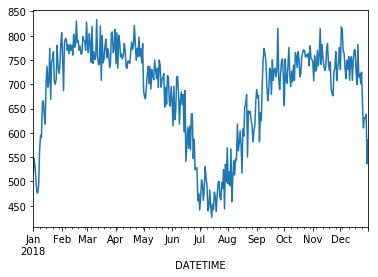

In [24]:
( df_orders
   [df_orders.RESTAURANT_NAME == 'Columbia'] 
   .set_index('DATETIME')
   .resample('D')
   .size()
   .plot() )

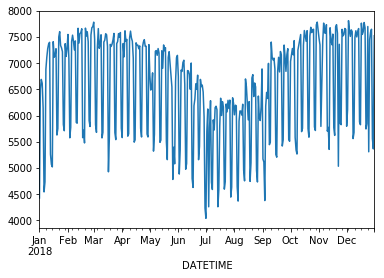

In [25]:
( df_orders
   .set_index('DATETIME')
   .resample('D')
   .size()
   .plot() )

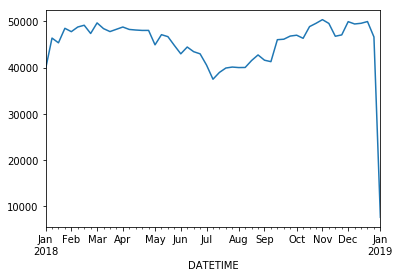

In [26]:
( df_orders
   .set_index('DATETIME')
   .resample('W')
   .size()
   .plot() )

In [27]:
( df_orders
   [df_orders.RESTAURANT_NAME == 'Columbia'] 
   .set_index('DATETIME')
   .resample('D')
   .size()
   .head() )

DATETIME
2018-01-01    519
2018-01-02    547
2018-01-03    532
2018-01-04    502
2018-01-05    477
Freq: D, dtype: int64

In [28]:
( df_orders
   [df_orders.RESTAURANT_NAME == 'Columbia'] 
   .set_index('DATETIME')
   .resample('D')
   .size()
   .rolling(3)
   .mean()
   .head() )

DATETIME
2018-01-01           NaN
2018-01-02           NaN
2018-01-03    532.666667
2018-01-04    527.000000
2018-01-05    503.666667
Freq: D, dtype: float64

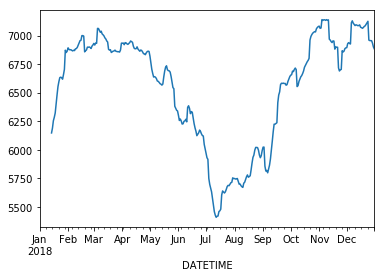

In [29]:
( df_orders
   .set_index('DATETIME')
   .resample('D')
   .size()
   .rolling(14)
   .mean()
   .plot() )

In [30]:
( df_orders.set_index(df_orders.DATETIME)
           .groupby('RESTAURANT_NAME')
           .resample('D')
           .size()
           .reset_index()
           .head() )

,RESTAURANT_NAME,DATETIME,0
0,Bryant Park,2018-01-01,373
1,Bryant Park,2018-01-02,789
2,Bryant Park,2018-01-03,818
3,Bryant Park,2018-01-04,782
4,Bryant Park,2018-01-05,719


In [31]:
( df_orders.set_index(df_orders.DATETIME)
           .groupby('RESTAURANT_NAME')
           .resample('M')
           .DRINKS
           .sum()
           .reset_index()
           .head() )

,RESTAURANT_NAME,DATETIME,DRINKS
0,Bryant Park,2018-01-31,1414.0
1,Bryant Park,2018-02-28,1336.0
2,Bryant Park,2018-03-31,1427.0
3,Bryant Park,2018-04-30,1478.0
4,Bryant Park,2018-05-31,2340.0
